<a href="https://colab.research.google.com/github/afham123/Internship-Assignment/blob/main/Semantic_text_similarity_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Text_Similarity_Dataset.csv')
df.head()

,Unique_ID,text1,text2
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...


# E.D.A.

In [ ]:
len(df)

4023

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4023 non-null   int64 
 1   Unique_ID   4023 non-null   int64 
 2   text1       4023 non-null   object
 3   text2       4023 non-null   object
dtypes: int64(2), object(2)
memory usage: 125.8+ KB


In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4023 entries, 0 to 4022
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Unique_ID  4023 non-null   int64 
 1   text1      4023 non-null   object
 2   text2      4023 non-null   object
dtypes: int64(1), object(2)
memory usage: 125.7+ KB


In [35]:
df['text1_length']=df['text1'].apply(len)
df['text2_length'] = df['text2'].apply(len)
df.head()

,Unique_ID,text1,text2,text1_length,text2_length
0,0,savvy searchers fail to spot ads internet sear...,newcastle 2-1 bolton kieron dyer smashed home ...,2865,3680
1,1,millions to miss out on the net by 2025 40% o...,nasdaq planning $100m share sale the owner of ...,3205,1171
2,2,young debut cut short by ginepri fifteen-year-...,ruddock backs yapp s credentials wales coach m...,1785,2132
3,3,diageo to buy us wine firm diageo the world s...,mci shares climb on takeover bid shares in us ...,910,1861
4,4,be careful how you code a new european directi...,media gadgets get moving pocket-sized devices ...,6280,4204


Plotting the text length

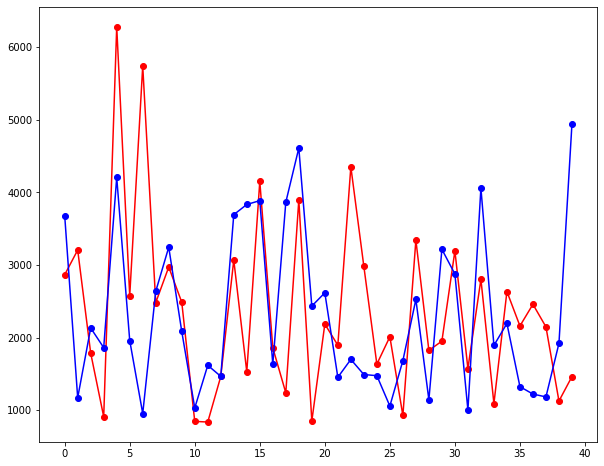

In [43]:
plt.figure(figsize=(10,8))
plt.plot(df['text1_length'][:40],'r-o')
plt.plot(df['text2_length'][:40],'b-o')

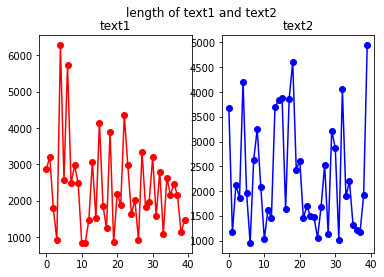

In [60]:
fig, (plt1, plt2) = plt.subplots(1, 2,)
fig.suptitle('length of text1 and text2')
plt1.plot(df['text1_length'][:40],'r-o')
plt1.set_title('text1')
plt2.plot(df['text2_length'][:40],'b-o')
plt2.set_title('text2')
plt.show()

## Text Preprocessing
In the code below we are first removing the stopwords, punctuations and numbers from the text and then lemmatizing it using wordnet lemmatizer.

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
en_stopwords = stopwords.words('english')

def text_preprocessing(text):
        #Removing stopwords
        text = text.lower()
        lst =  [ word for word in text.split() if word.lower() not in en_stopwords ]
        
        #Removing punctuations
        tokenizer = RegexpTokenizer(r"\w+")
        no_punct = tokenizer.tokenize(' '.join(lst))
        
        #Removing numbers
        no_numbers = ' '.join([i for i in no_punct if not i.isdigit()])
        
        #removing extra spaces.
        res=' '.join(no_numbers.split())
        
        #Lemmatizing
        result=[]
        wordnet = WordNetLemmatizer()
        for token,tag in pos_tag(res):
            pos=tag[0].lower()

            if pos not in ['a', 'r', 'n', 'v']:
                pos='n'

            result.append(wordnet.lemmatize(token,pos))
        return ''.join(result).lower()

In [ ]:
#text before preprcossing
df['text1'][1]

'millions to miss out on the net by 2025  40% of the uk s population will still be without internet access at home  says a study.  around 23 million britons will miss out on a wide range of essential services such as education and medical information  predicts the report by telecoms giant bt. it compares to 27 million  or 50%  of the uk  who are not currently online. the idea that the digital divide will evaporate with time is  wishful thinking   the report concludes.  the study calls on the government and telecoms industry to come up with new ways to lure those that have been bypassed by the digital revolution. although the percentage of britons without home access will have fallen slightly  those that remain digital refuseniks will miss out on more  the report suggests. as more and more everyday tasks move online and offline services become less comprehensive  the divide will become more obvious and more burdensome for those that have not got net access  it predicts.  the gap between

In [ ]:
#text after preprocessing
text_preprocessing(df['text1'][1])

millions miss net uk population still without internet access home says study around million britons miss wide range essential services education medical information predicts report telecoms giant bt compares million uk currently online idea digital divide evaporate time wishful thinking report concludes study calls government telecoms industry come new ways lure bypassed digital revolution although percentage britons without home access fallen slightly remain digital refuseniks miss report suggests everyday tasks move online offline services become less comprehensive divide become obvious burdensome got net access predicts gap have nets have nots much talked predictions divide affect future generations less discussed bt set predict future patterns based current information taking account way technology changing optimists predict convergence emergence user friendly technology bridge digital divide could way mark report suggests internet access devices tends something taken already said

'millions miss net uk population still without internet access home says study around million britons miss wide range essential services education medical information predicts report telecoms giant bt compares million uk currently online idea digital divide evaporate time wishful thinking report concludes study calls government telecoms industry come new ways lure bypassed digital revolution although percentage britons without home access fallen slightly remain digital refuseniks miss report suggests everyday tasks move online offline services become less comprehensive divide become obvious burdensome got net access predicts gap have nets have nots much talked predictions divide affect future generations less discussed bt set predict future patterns based current information taking account way technology changing optimists predict convergence emergence user friendly technology bridge digital divide could way mark report suggests internet access devices tends something taken already sai

In [10]:
df['text1']=df['text1'].apply(text_preprocessing)
df['text2']=df['text2'].apply(text_[reprocessing])
print('Text preprocessing completed')

Text preprocessing completed


## Calculation
In the code below we are firt converting the text into tfidf vectorizer using sklearn's TfidfVectoeizer and then calculating the cosine function of the text.

In [4]:
from gensim.models import Doc2Vec
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

### Calculating similarity score usining tfidf

In [ ]:
def tfidf_cosine_similarity(text1, text2):
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]

### Calculating Similarity score using bert cosine similarity

In [ ]:
def bert_cosine_similarity(text1,text2):
    model = SentenceTransformer('bert-base-nli-mean-tokens')

    sent1=model.encode(text1)
    sent2=model.encode(text2)
    return cosine_similarity([sent1],[sent2])

### Calculating similarity score using robetra large cosine similarity model

In [5]:
def roberta_large_cos_sim(text1,text2):
    model = SentenceTransformer('stsb-roberta-large')
    embedding1 = model.encode(text1, convert_to_tensor=True)
    embedding2 = model.encode(text2, convert_to_tensor=True)
    # compute similarity scores of two embeddings
    cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
    return cosine_scores.item()

### Calculating similarity score using spacy library

In [ ]:
import spacy
   
def spacy_similarity(text1,text2):
    
    nlp = spacy.load("en_core_web_sm")
    
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return doc1.similarity(doc2)

Caliing the above described similarity functions and calculating similarity score

In [11]:
spacy_sim=[]
birt_sim=[]
tfidf_sim=[]
robetra_sim=[]

for i in range(1000,1200):
    
    text1=df.text1[i]
    text2=df.text2[i]
    
    spacy_sim.append(spacy_similarity(text1,text2))
    birt_sim.append(bert_cosine_similarity(text1,text2)[0][0])
    tfidf_sim.append(tfidf_cosine_similarity(text1,text2))
    robetra_sim.append(roberta_large_cos_sim(text1,text2))

print('Task completed')

Task completed


## Result
On plotting the similarity score from spacy, robetra, tfidf and bert similarity score we can see that the robetra is giving the best outcome.

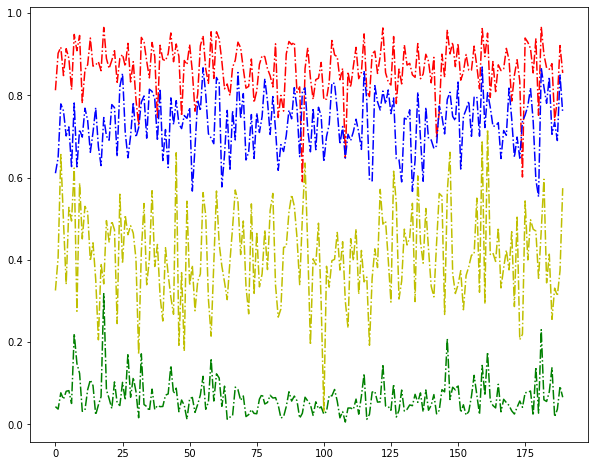

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(spacy_sim[:200],'r-.')  
plt.plot(robetra_sim[:200],'b-.')
plt.plot(tfidf_sim[:200],'g-.')
plt.plot(bert_sim[:200],'y-.')

If the similarity score predicted by roberta model is greater than 0.5 we are making it 1 that is similar or else zero and storing it in the data frame as 'similar_score'.

In [33]:
lst=[]
for i in range(len(df)):
  if df.roberta_model[i] >= 0.5:
    lst.append(1)
  else:
    lst.append(0)
df['similar_score']=lst

Similar text dataframe

In [26]:
df[df['similar_score']==1].head(5)

,Unique_ID,text1,text2,roberta_model,similar_score
2,2,young debut cut short ginepri fifteen year old...,ruddock backs yapp credentials wales coach mik...,0.580873,1
5,5,india seeks boost construction india cleared p...,music mogul fuller sells company pop idol supr...,0.541488,1
7,7,row police power csos police federation said s...,ban hunting comes force fox hunting dogs illeg...,0.576415,1
9,9,japan economy slides recession japanese econom...,optimism remains uk housing uk property market...,0.576359,1
19,19,us firm bids lacroix label us firm said final ...,yukos seeks court action sale yukos return us ...,0.529588,1


Dissimilar text dataframe

In [25]:
df[df['similar_score']==0].head(5)

,Unique_ID,text1,text2,roberta_model,similar_score
0,0,savvy searchers fail spot ads internet search ...,newcastle bolton kieron dyer smashed home winn...,0.299560,0
1,1,millions miss net uk population still without ...,nasdaq planning 100m share sale owner technolo...,0.375383,0
3,3,diageo buy us wine firm diageo world biggest s...,mci shares climb takeover bid shares us phone ...,0.495504,0
4,4,careful code new european directive could put ...,media gadgets get moving pocket sized devices ...,0.273982,0
6,6,podcasters look net money nasa year old boys b...,ukip outspent labour eu poll uk independence p...,0.455853,0


Printing text having similar meaning

In [15]:
print(df['text1'][2])
print(df['text2'][2])

young debut cut short ginepri fifteen year old donald young first appearance atp tennis tournament proved brief teenager went round one san jose open young shot top junior world rankings boys singles january australian open wildcard entry dispatched fellow american robby ginepri straight sets california despite happy tour debut fun chances come said young beat two players ranked top first set losing next games ginepri six years older youngest player ever win junior slam top global standings admitted impressed talented said ginepri got long future ahead him left handed quick around court serve little deceptive came net volleyed better thought earlier south korean hyung taik lee defeated american jan michael gambill american kevin kim defeated jan hernych czech republic canadian qualifier frank dancevic downed american jeff morrison denmark kenneth carlsen beat irakli labadze republic georgia top seed andy roddick launches defence title wednesday qualifier paul goldstein second seed andr

Countplot of similar_score of text

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


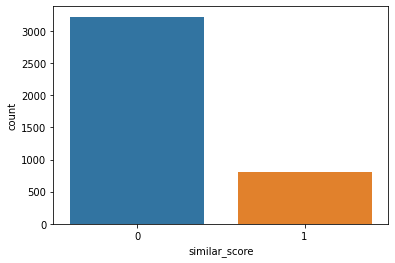

In [23]:
import seaborn as sns
sns.countplot(df['similar_score'])

plotting the result robetra_similar model.

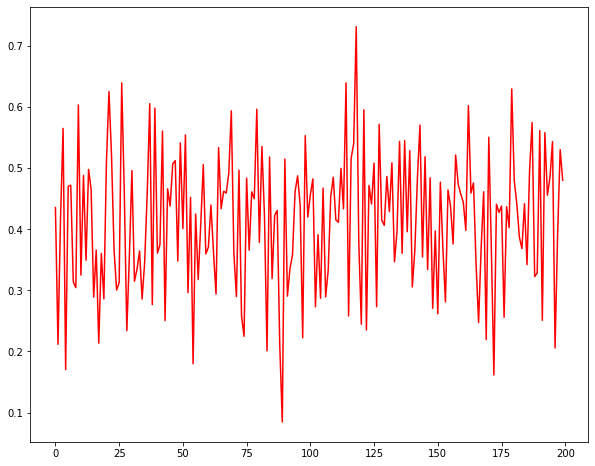

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(robetra_sim,'r')

Making a result data frame having 'Unique_ID', 'similar_score' columns.

In [29]:
result_df=df[['Unique_ID','similar_score']]
result_df.head()

,Unique_ID,similar_score
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


Exporting data

In [30]:
df.to_csv('/content/drive/My Drive/result.csv')